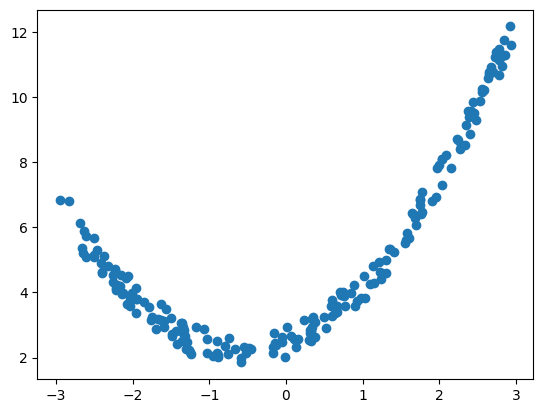

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

x = 6 * np.random.rand(200, 1) - 3
y = 0.8 * x**2 + 0.9 * x + 2 + np.random.rand(200, 1)

plt.scatter(x, y)

0.48121301200831723


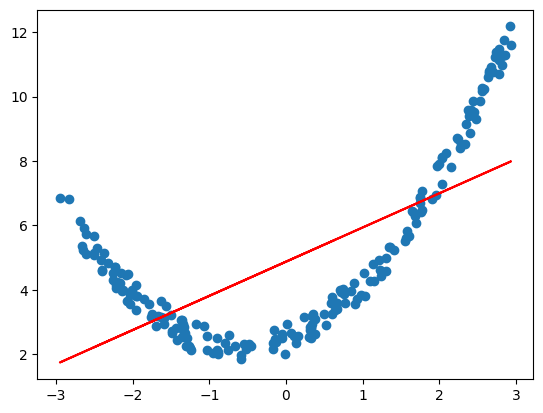

In [3]:
# TRYING TO APPLY LINEAR REGRESSION

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)
reg = LinearRegression()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)

r2 = r2_score(y_test, y_pred)
print(r2)

plt.scatter(x, y)
plt.plot(x_train, reg.predict(x_train), color="red")


In [12]:
# APPYING POLYNOMIAL LINEAR REGRESSION
poly = PolynomialFeatures(degree=2)

x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.transform(x_test)

# print(x_train[0])
# print(x_train_trans[0]) 

reg.fit(x_train_trans, y_train)
y_pred = reg.predict(x_test_trans)

r2 = r2_score(y_test, y_pred)
print(reg.coef_)
print(reg.intercept_)
print(r2)


[[ 0.00000000e+00  9.67224738e-01  6.51688818e-01 -3.17676979e-02
   9.82559074e-02  9.33293173e-03 -2.65112777e-02 -7.96976101e-04
   3.22623178e-03 -3.29117192e-07 -1.46093611e-04]]
[2.53844802]
0.9887011230847186


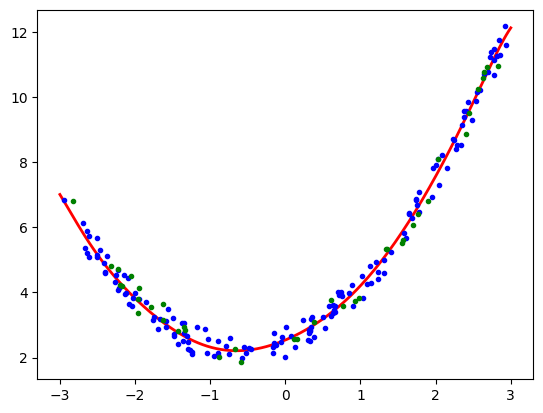

In [13]:
x_new=np.linspace(-3, 3, 200).reshape(200, 1)
x_new_poly = poly.transform(x_new)
y_new = reg.predict(x_new_poly)

plt.plot(x_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(x_train, y_train, "b.",label='Training points')
plt.plot(x_test, y_test, "g.",label='Testing points')